In [33]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import sklearn 
import sklearn.mixture as mix 

Testing a small universe of the 10Y Treasury, an Oil ETF, and Tech ETF 

In [34]:
assetlist = [ 'IEF', 'GSG', 'IXN' ]
num_components = 99

Create the subset of assets.

In [35]:
m6 = pd.read_csv('./data/assets_m6.csv')
m6_subset = pd.DataFrame()

for sym in assetlist: 
    m6_subset[sym] = m6[m6['symbol'] == sym]['price'].values

1st-order differencing of the rolling average log price for each asset. 

In [36]:
m6_subset = m6_subset.apply(np.log).rolling(25).mean().diff().dropna().reset_index().drop(columns='index')
print(m6_subset)

          IEF       GSG       IXN
0   -0.000204  0.012063 -0.005155
1   -0.000397  0.007237 -0.003659
2   -0.000663  0.006237 -0.004641
3   -0.000503  0.006809 -0.004202
4   -0.000704  0.004659 -0.005046
..        ...       ...       ...
169 -0.001535  0.003095  0.000539
170 -0.001352  0.001268 -0.000437
171 -0.000835 -0.000473 -0.001523
172  0.000274 -0.000380  0.001966
173  0.000387 -0.000338  0.004503

[174 rows x 3 columns]


Instantiate a non-parametric clustering model using the dirichlet process. 

In [37]:
dpgmm_model = mix.BayesianGaussianMixture(n_components=num_components, weight_concentration_prior_type='dirichlet_process').fit(m6_subset)

In [38]:
states = dpgmm_model.predict(m6_subset)
state_counts = np.zeros(num_components)

for M in states:
  state_counts[M] += 1 

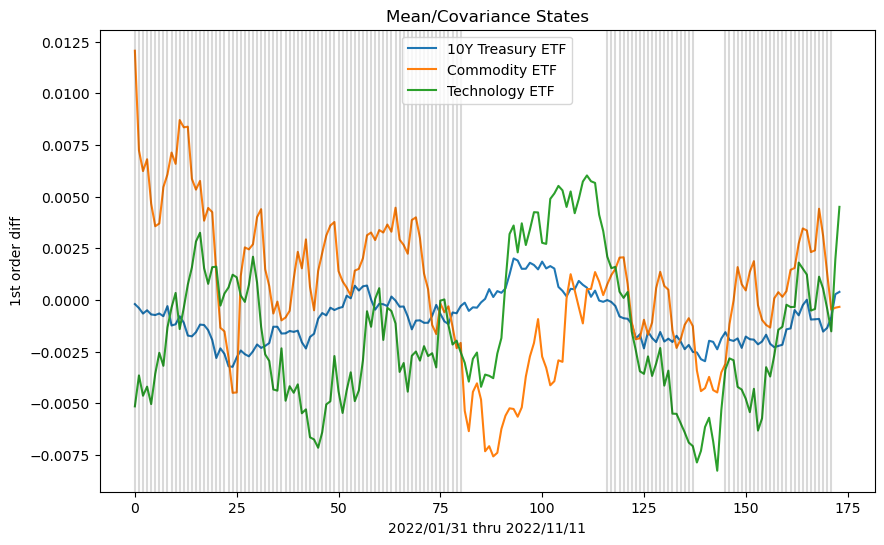

In [39]:
fig,ax = plt.subplots(figsize=(10, 6
                              ))

sns.lineplot(data=m6_subset['IEF'], ax=ax, label='10Y Treasury ETF')
sns.lineplot(data=m6_subset['GSG'], ax=ax, label='Commodity ETF')
sns.lineplot(data=m6_subset['IXN'], ax=ax, label='Technology ETF')

for M in range(len(states)): 
  if states[M] == np.argmax(state_counts):
    ax.axvline(M, color='black', alpha=0.15)

ax.set_title('Mean/Covariance States')
ax.set_ylabel('1st order diff')
ax.set_xlabel(f'2022/01/31 thru 2022/11/11')
plt.show()

In [40]:
print(dpgmm_model.means_)

[[-0.00111847 -0.00277655 -0.00395948]
 [-0.00089385  0.00041615 -0.00149137]
 [-0.00089381  0.00041611 -0.00149135]
 [-0.00089378  0.00041607 -0.00149133]
 [-0.0012375   0.00165716 -0.0021419 ]
 [-0.00089358  0.00041582 -0.0014912 ]
 [-0.00089341  0.00041562 -0.0014911 ]
 [-0.00089326  0.00041543 -0.001491  ]
 [-0.00089311  0.00041524 -0.00149091]
 [-0.00089297  0.00041507 -0.00149082]
 [ 0.00082213 -0.00168274  0.00377845]
 [-0.0008896   0.00041087 -0.00148884]
 [-0.0008896   0.00041087 -0.00148884]
 [-0.0008896   0.00041087 -0.00148884]
 [-0.0008896   0.00041087 -0.00148884]
 [-0.0008896   0.00041087 -0.00148884]
 [-0.0008896   0.00041087 -0.00148884]
 [-0.0008896   0.00041087 -0.00148884]
 [-0.0008896   0.00041087 -0.00148884]
 [-0.0008896   0.00041087 -0.00148884]
 [-0.0008896   0.00041087 -0.00148884]
 [-0.0008896   0.00041087 -0.00148884]
 [-0.0008896   0.00041087 -0.00148884]
 [-0.0008896   0.00041087 -0.00148884]
 [-0.0008896   0.00041087 -0.00148884]
 [-0.0008896   0.00041087